In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import pickle

%matplotlib inline

In [2]:
# Load camera calibration
cam_calib = pickle.load(open('./data/camera_calib.p','rb'))
mtx, dist = map(cam_calib.get, ('mtx','dist'))

Test Images:


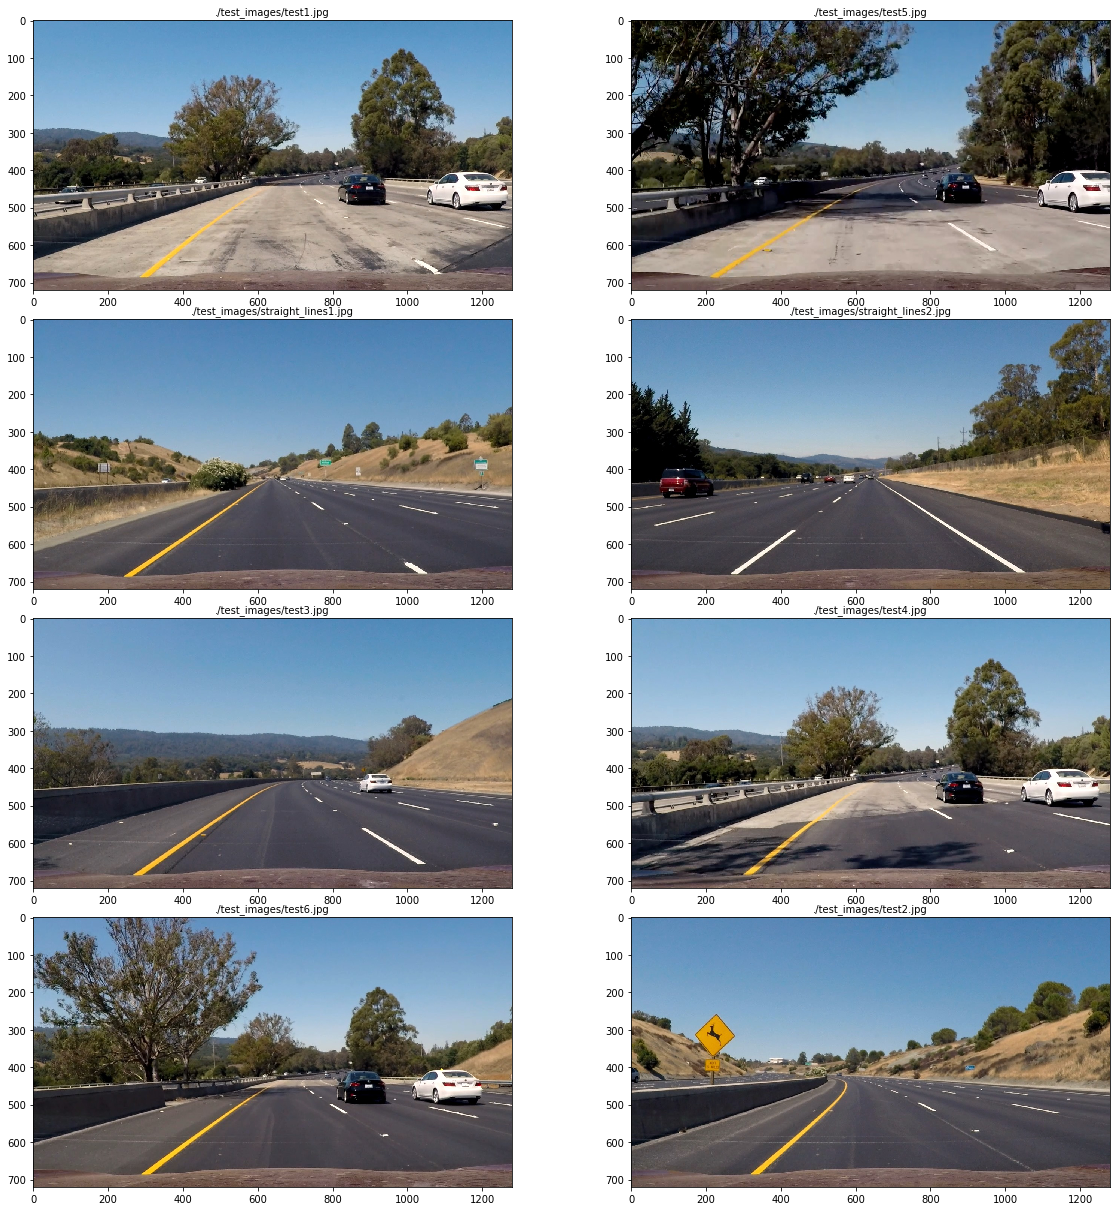

In [3]:
# Load and display test images.
test_images = []    # Store test images

# Make a list of test images
fname = glob.glob('./test_images/*.jpg')
for i, path in enumerate(fname):
    img = mpimg.imread(path)
    test_images.append(img)
    
plt.figure(figsize=(15, 12))
gridspec.GridSpec(4, 2)

print('Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    ax1.imshow(test_images[idx])
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

1280 720


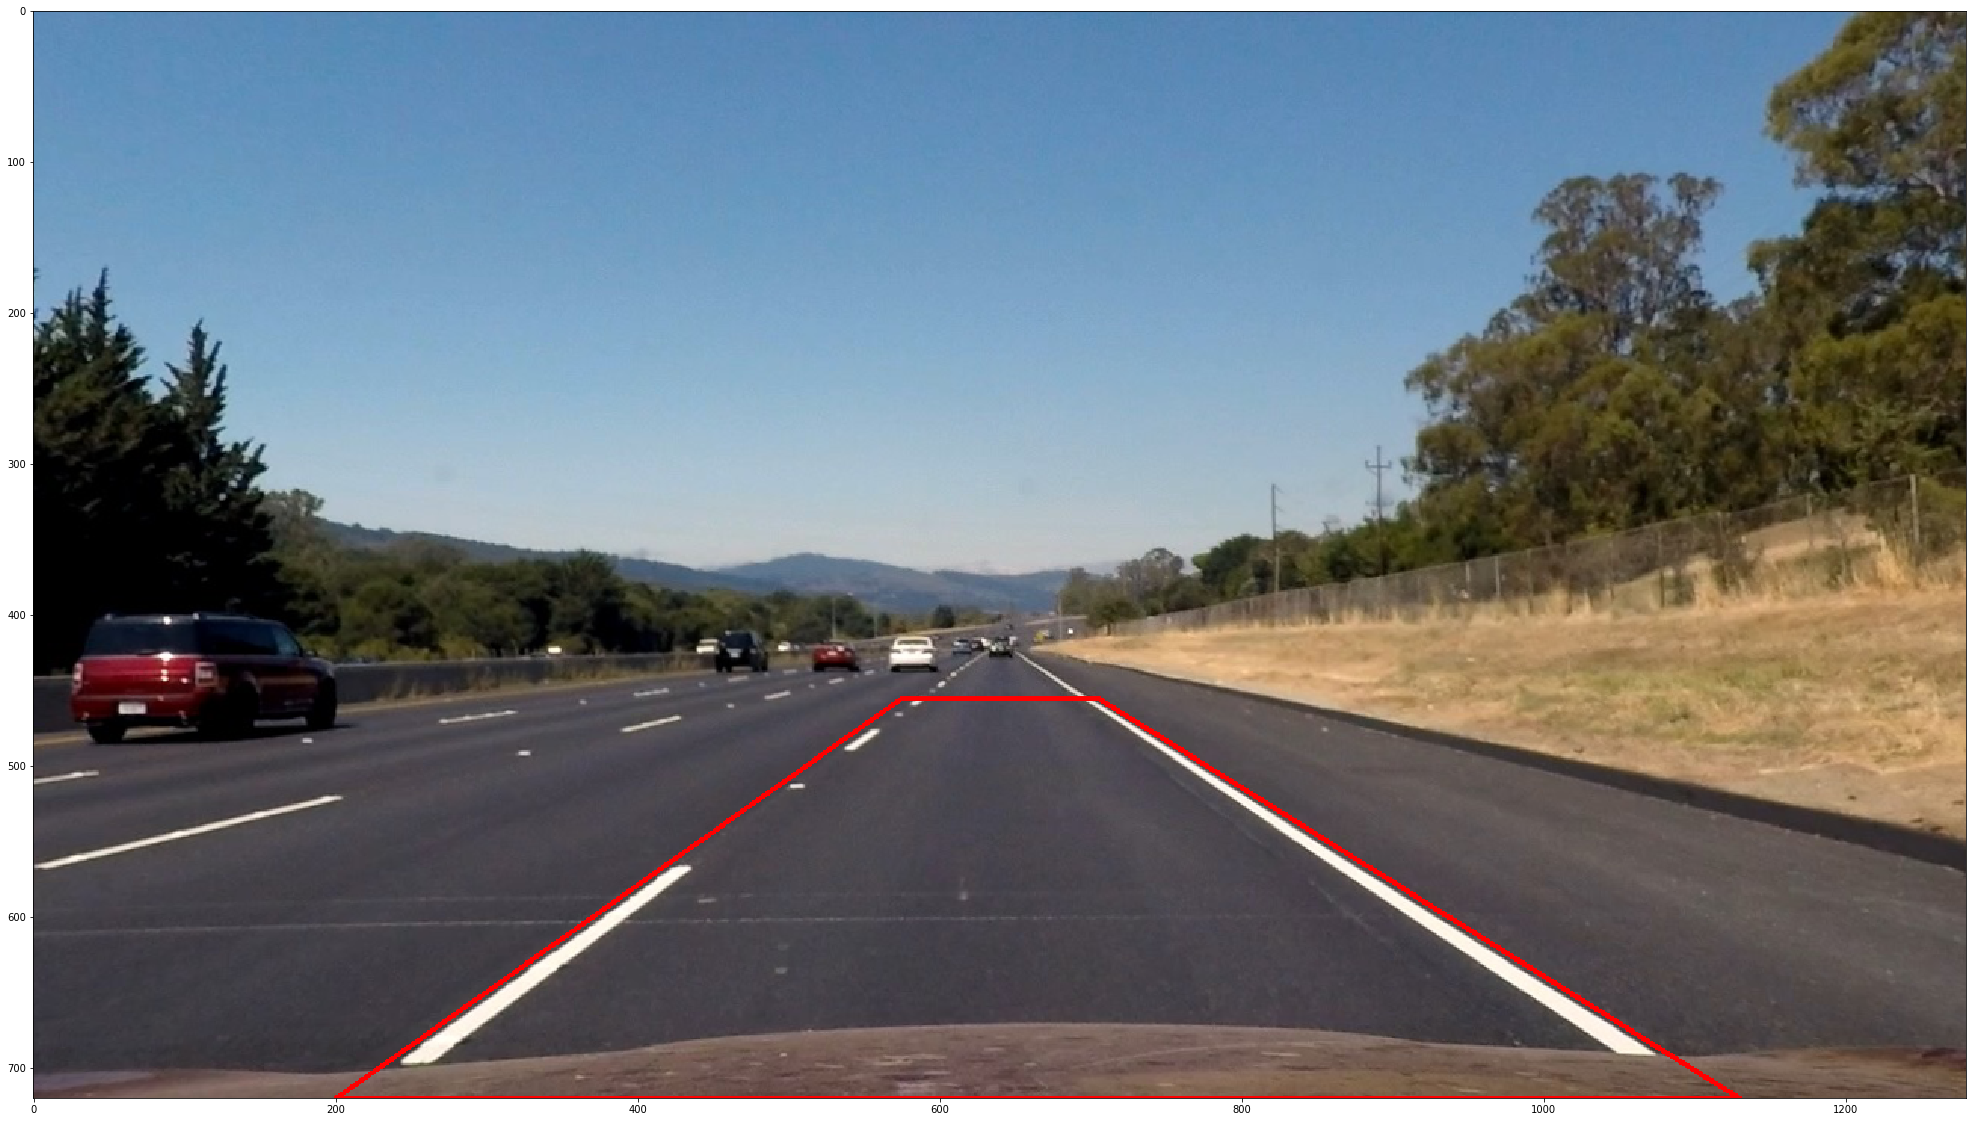

In [4]:
idx = 3

img01 = test_images[idx]
undist = cv2.undistort(img01, mtx, dist, None, mtx)

ydim, xdim, _ = undist.shape
print(xdim, ydim)
copy = undist.copy()

bottomY = 720
topY    = 455
x1      = 200
x2      = 1130
y1      = 65

c1 = (x1, bottomY)
c2 = (int(x2), bottomY)
c3 = (int(640+y1), topY)
c4 = (int(640-y1), topY)

colour = [255, 0, 0]
w = 2
cv2.line(copy,c1, c2, colour, w)
cv2.line(copy,c2, c3, colour, w)
cv2.line(copy,c3, c4, colour, w)
cv2.line(copy,c1, c4, colour, w)
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(copy)
fig.savefig('./output_images/Display_Images/persp_transform_example.jpg')
#print(c1[0],c1[1])

(1280, 720)
Test Perspective Transform:


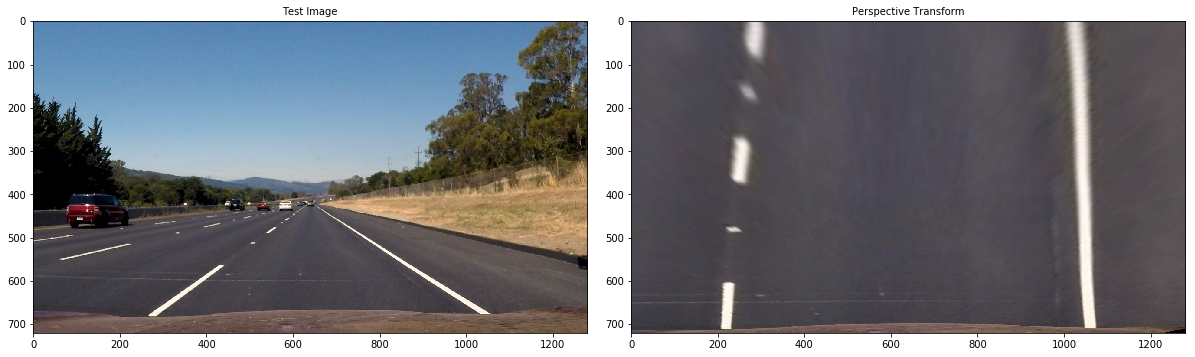

In [5]:
gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
src = np.float32([[c1[0], c1[1]],[c2[0], c2[1]],[c3[0], c3[1]], [c4[0], c4[1]]])
img_size = (gray.shape[1], gray.shape[0])
print(img_size)
offset = 200
dst = np.float32([[offset, img_size[1]], [img_size[0]-offset, img_size[1]],
    [img_size[0]-offset, 0], [offset, 0]])
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist, M, img_size)

test_persp_transform = []
test_persp_transform.append(img01)
test_persp_transform.append(warped)
title_1 = ['Test Image','Perspective Transform']

print('Test Perspective Transform:')
f, ax = plt.subplots(1, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(2)):
    ax1.imshow(test_persp_transform[idx])
    ax1.set_title(title_1[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('./output_images/Display_Images/persp_transform_sidebyside.jpg')

Perspective Transform All:


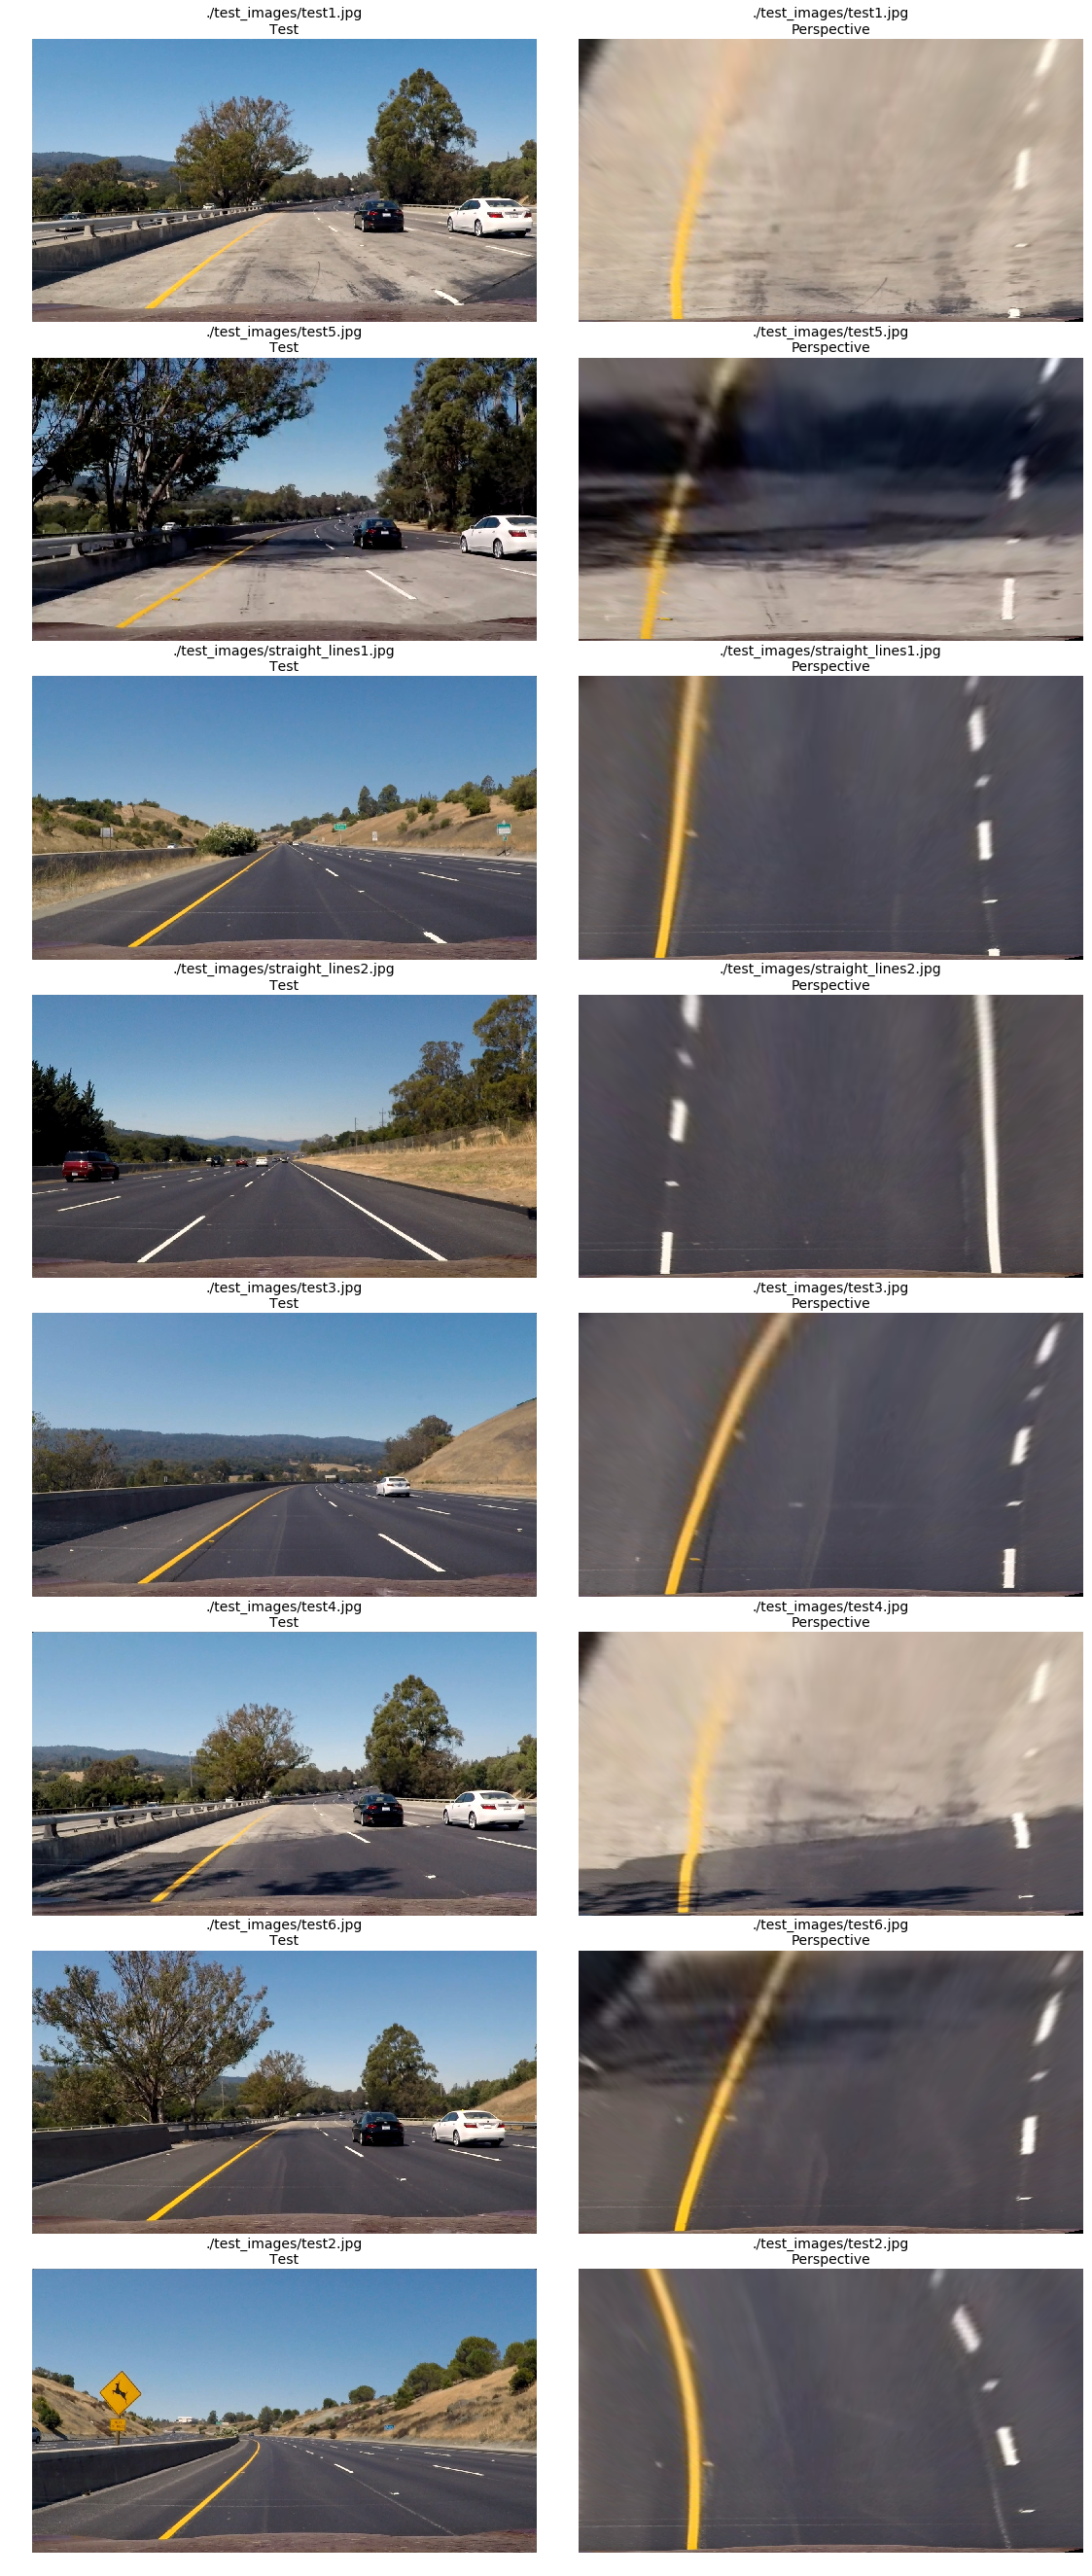

In [6]:
title_2 = ['Test','Perspective']
persp_trans = []
img_title = []

for ii in range(8):
    undist1 = cv2.undistort(test_images[ii], mtx, dist, None, mtx)
    warped1 = cv2.warpPerspective(undist1, M, img_size)
    persp_trans.append(warped1)
    for jj in range(2):
        img_title.append(fname[ii] + '\n' + title_2[jj])
        
compare_img = list(zip(test_images,persp_trans))
flat_img = [item for sublist in compare_img for item in sublist]
print('Perspective Transform All:')
f, ax = plt.subplots(8, 2, figsize=(15, 40))
f.tight_layout()
for ax1, idx in zip(ax.flat, range(16)):
    ax1.imshow(flat_img[idx],cmap='gray')
    ax1.set_title(img_title[idx], fontsize=14)
    ax1.axis('off')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('./output_images/Display_Images/persp_transform_all.jpg')

In [7]:
pickle.dump( { 'M': M, 'Minv': Minv }, open('./data/perspective_transform.p', 'wb'))

In [8]:
print(M)

print(Minv)

[[ -7.07631619e-01  -1.48687604e+00   1.06250948e+03]
 [ -1.04360964e-14  -2.03186163e+00   9.24497041e+02]
 [ -1.51788304e-17  -2.42755272e-03   1.00000000e+00]]
[[  1.47727273e-01  -7.59781959e-01   5.45454545e+02]
 [ -2.44249065e-15  -4.92159498e-01   4.55000000e+02]
 [ -2.16840434e-18  -1.19474313e-03   1.00000000e+00]]
